# Healthcare Insurance Analysis

## Problem Statement
A significant public health concern is the rising cost of healthcare. Therefore, it's crucial to be able to predict future costs and gain a solid understanding of their causes. The insurance industry must also take this analysis seriously. This analysis may be used by healthcare insurance providers to make a variety of strategic and tactical decisions.

## Objective
The objective of this project is to predict patients’ healthcare costs and to identify factors contributing to this prediction. It will also be useful to learn the interdependencies of different factors and comprehend the significance of various tools at various stages of the healthcare cost prediction process.

## Install Important Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## >> DATA SCIENCE

### 1. Collate the files so that all the information is in one place 

In [57]:
df1=pd.read_csv('Hospitalisation details.csv')
df2=pd.read_csv('Medical Examinations.csv')
df3=pd.read_csv('Names.csv')
df=pd.merge(df1, df2,on='Customer ID')
df=pd.merge(df, df3, on='Customer ID')
df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P"
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie"
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr."
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan"


### 2. Check for missing values in the dataset

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   year                    2335 non-null   object 
 2   month                   2335 non-null   object 
 3   date                    2335 non-null   int64  
 4   children                2335 non-null   int64  
 5   charges                 2335 non-null   float64
 6   Hospital tier           2335 non-null   object 
 7   City tier               2335 non-null   object 
 8   State ID                2335 non-null   object 
 9   BMI                     2335 non-null   float64
 10  HBA1C                   2335 non-null   float64
 11  Heart Issues            2335 non-null   object 
 12  Any Transplants         2335 non-null   object 
 13  Cancer history          2335 non-null   object 
 14  NumberOfMajorSurgeries  2335 non-null   

#### Upon initial inspection, it looks like there are no null values. But the dataset contains '?' at some places. For Example -

In [59]:
df.loc[df['State ID']=='?']

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
542,Id1793,1995,Dec,1,3,4827.90,tier - 1,tier - 2,?,18.905,4.91,yes,No,No,1,No,"Capriolo, Mr. Michael"
2165,Id170,2000,Sep,5,1,37165.16,tier - 1,tier - 3,?,37.620,6.32,yes,yes,No,2,yes,"Torphy, Mr. Bobby"


### 3. Find the percentage of rows that have trivial value (for example, ?), and delete such rows if they do not contain significant information.

In [60]:
trivial_counts=df.eq('?').sum().sum()
trivial_percentage=(trivial_counts/len(df))*100
print('Trivial Counts:',trivial_counts)
print('Trivial Percentgae: %.2f' % trivial_percentage + '%')

Trivial Counts: 11
Trivial Percentgae: 0.47%


#### Detailed columnwise Trivial counts 

In [61]:
trivial_counts=df.eq('?').sum()
trivial_percentage=(trivial_counts/len(df))*100        ## Here,len(df)==2335

# Create a table with trivial counts and percentages
table = [['Features', 'Trivial Counts', 'Trivial Percentage (%)']]
for feat, count in trivial_counts.items():
    table.append([feat, count, trivial_percentage[feat]])

# Print the table using tabulate
from tabulate import tabulate
print(tabulate(table, headers='firstrow', tablefmt='psql'))

+------------------------+------------------+--------------------------+
| Features               |   Trivial Counts |   Trivial Percentage (%) |
|------------------------+------------------+--------------------------|
| Customer ID            |                0 |                0         |
| year                   |                2 |                0.0856531 |
| month                  |                3 |                0.12848   |
| date                   |                0 |                0         |
| children               |                0 |                0         |
| charges                |                0 |                0         |
| Hospital tier          |                1 |                0.0428266 |
| City tier              |                1 |                0.0428266 |
| State ID               |                2 |                0.0856531 |
| BMI                    |                0 |                0         |
| HBA1C                  |                0 |      

#### We can see that those trivial values contains around 0.1% data in each feature. So, we can eliminate them.


In [62]:
# Replace '?' with NaN values
df.replace('?',np.nan, inplace=True)

In [63]:
#Check Null Values
df.dropna(inplace=True)
df.isnull().sum()

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
name                      0
dtype: int64

In [64]:
#check Duplicate Values
df['Customer ID'].duplicated().sum()

np.int64(0)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2325 entries, 0 to 2334
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2325 non-null   object 
 1   year                    2325 non-null   object 
 2   month                   2325 non-null   object 
 3   date                    2325 non-null   int64  
 4   children                2325 non-null   int64  
 5   charges                 2325 non-null   float64
 6   Hospital tier           2325 non-null   object 
 7   City tier               2325 non-null   object 
 8   State ID                2325 non-null   object 
 9   BMI                     2325 non-null   float64
 10  HBA1C                   2325 non-null   float64
 11  Heart Issues            2325 non-null   object 
 12  Any Transplants         2325 non-null   object 
 13  Cancer history          2325 non-null   object 
 14  NumberOfMajorSurgeries  2325 non-null   objec

#### So, total 10 data have been dropped, which is 0.43% of the total data.

### 4. Use the necessary transformation methods to deal with the nominal and ordinal categorical variables in the dataset.

In [66]:
df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P"
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie"
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr."
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan"


#### We observe that 'Hospital tier' and 'City tier' columns have alphanumeric values. We aim to convert them into numerical values, where 'tier-1' becomes '1', 'tier-2' becomes '2', etc., to enable more efficient data handling.

In [67]:
df['Hospital_tier_num'] = df['Hospital tier'].str.extract('tier - (\d+)').astype(int)
df['City_tier_num'] = df['City tier'].str.extract('tier - (\d+)').astype(int)
df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,Hospital_tier_num,City_tier_num
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K",2,3
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P",2,1
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie",2,1
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr.",3,3
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan",3,3


### 5. The dataset has State ID, which has around 16 states. All states are not represented in equal proportions in the data. Creating dummy variables for all regions may also result in too many insignificant predictors. Nevertheless, only R1011, R1012, and R1013 are worth investigating further. Design a suitable strategy to create dummy variables with these restraints.

In [68]:
df['State ID'].value_counts()

State ID
R1013    609
R1011    574
R1012    572
R1024    159
R1026     84
R1021     70
R1016     64
R1025     40
R1023     38
R1017     36
R1019     26
R1022     14
R1014     13
R1015     11
R1018      9
R1020      6
Name: count, dtype: int64

In [69]:
# Create a new column called 'stateflag' that categorizes state IDs.

df['State_Flag'] = np.where((df['State ID'] == 'R1011') | (df['State ID'] == 'R1012') | (df['State ID'] == 'R1013'), df['State ID'], 'other')
df['State_Flag'].replace('R1011',1,inplace=True)
df['State_Flag'].replace('R1012',2,inplace=True)
df['State_Flag'].replace('R1013',3,inplace=True)
df['State_Flag'].replace('other',0,inplace=True)
df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,Hospital_tier_num,City_tier_num,State_Flag
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K",2,3,3
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P",2,1,3
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie",2,1,3
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr.",3,3,3
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan",3,3,3


### 6. The variable NumberOfMajorSurgeries also appears to have string values. Apply a suitable method to clean up this variable.

In [70]:
# Replace 'No major surgery' with '0'.
df['NumberOfMajorSurgeries'].replace('No major surgery','0',inplace=True)
df['NumberOfMajorSurgeries'] = df['NumberOfMajorSurgeries'].astype(int)
df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,Hospital_tier_num,City_tier_num,State_Flag
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K",2,3,3
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P",2,1,3
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie",2,1,3
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr.",3,3,3
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan",3,3,3


### 7. Age appears to be a significant factor in this analysis. Calculate the patients' ages based on their dates of birth.

In [71]:
#Covert 'year' column into int datatype.
df['year']=df['year'].astype('int') 

# create a dictionary to map month names to integers
month_no = {'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# convert month column to integer using the dictionary
df['month'] = df['month'].map(month_no)

# Calculate Date of Birth
import datetime
df['D.O.B']=pd.to_datetime({'year': df['year'], 'month': df['month'], 'day': df['date']})

#Age Calculation
def age_calculation(DOB):
    today = datetime.datetime.today()
    age = today.year - DOB.year - ((today.month, today.day) < (DOB.month, DOB.day))
    return (age)

df['Age'] = df['D.O.B'].apply(age_calculation)

df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,...,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,Hospital_tier_num,City_tier_num,State_Flag,D.O.B,Age
0,Id2335,1992,7,9,0,563.84,tier - 2,tier - 3,R1013,17.58,...,No,No,1,No,"German, Mr. Aaron K",2,3,3,1992-07-09,32
1,Id2334,1992,11,30,0,570.62,tier - 2,tier - 1,R1013,17.60,...,No,No,1,No,"Rosendahl, Mr. Evan P",2,1,3,1992-11-30,31
2,Id2333,1993,6,30,0,600.00,tier - 2,tier - 1,R1013,16.47,...,No,Yes,1,No,"Albano, Ms. Julie",2,1,3,1993-06-30,31
3,Id2332,1992,9,13,0,604.54,tier - 3,tier - 3,R1013,17.70,...,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr.",3,3,3,1992-09-13,31
4,Id2331,1998,7,27,0,637.26,tier - 3,tier - 3,R1013,22.34,...,No,No,1,No,"Brietzke, Mr. Jordan",3,3,3,1998-07-27,26


### 8. The gender of the patient may be an important factor in determining the cost of hospitalization. The salutations in a beneficiary's name can be used to determine their gender. Make a new field for the beneficiary's gender.

In [72]:
#Create a new column called Gender where define Male as 1 and Female as 0.
gender = [1 if 'Mr.' in name else 0 for name in df['name']]
df['Gender']=gender
df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,...,Cancer history,NumberOfMajorSurgeries,smoker,name,Hospital_tier_num,City_tier_num,State_Flag,D.O.B,Age,Gender
0,Id2335,1992,7,9,0,563.84,tier - 2,tier - 3,R1013,17.58,...,No,1,No,"German, Mr. Aaron K",2,3,3,1992-07-09,32,1
1,Id2334,1992,11,30,0,570.62,tier - 2,tier - 1,R1013,17.60,...,No,1,No,"Rosendahl, Mr. Evan P",2,1,3,1992-11-30,31,1
2,Id2333,1993,6,30,0,600.00,tier - 2,tier - 1,R1013,16.47,...,Yes,1,No,"Albano, Ms. Julie",2,1,3,1993-06-30,31,0
3,Id2332,1992,9,13,0,604.54,tier - 3,tier - 3,R1013,17.70,...,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr.",3,3,3,1992-09-13,31,1
4,Id2331,1998,7,27,0,637.26,tier - 3,tier - 3,R1013,22.34,...,No,1,No,"Brietzke, Mr. Jordan",3,3,3,1998-07-27,26,1


### 9. You should also visualize the distribution of costs using a histogram, box and whisker plot, and swarm plot.

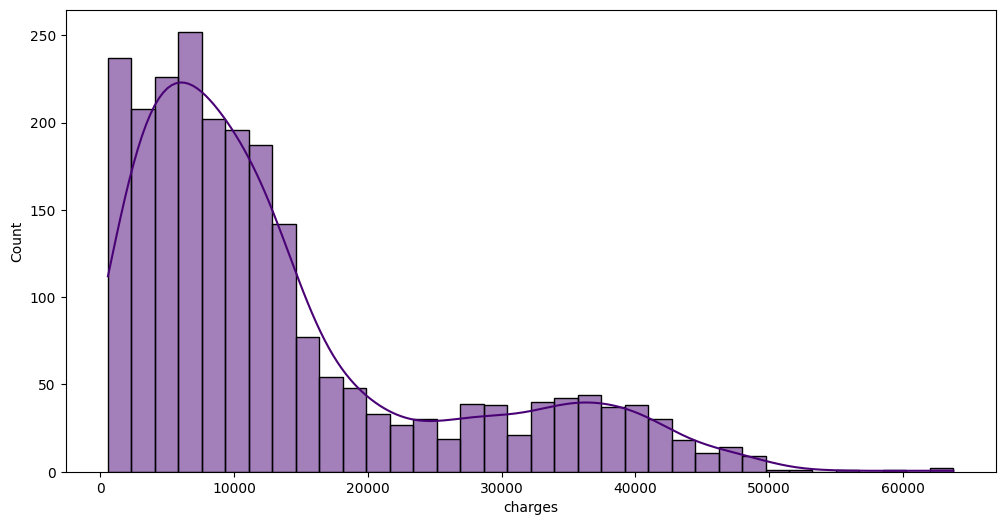

In [73]:
plt.figure(figsize=(12, 6))
sns.histplot(df['charges'], legend=True, kde=True,color="#490275")
plt.show()

#### Observation:
#### • The distribution is right-skewed (positively skewed), with a longer tail on the right side. This indicates that while most 'charges' values are lower, there are some significantly higher values.
#### • The majority of 'charges' values fall below 20,000. Beyond this point, the frequency of 'charges' decreases, but there are still some occurrences up to 60,000.
#### • The highest peak in the histogram occurs between 5,000 and 10,000.

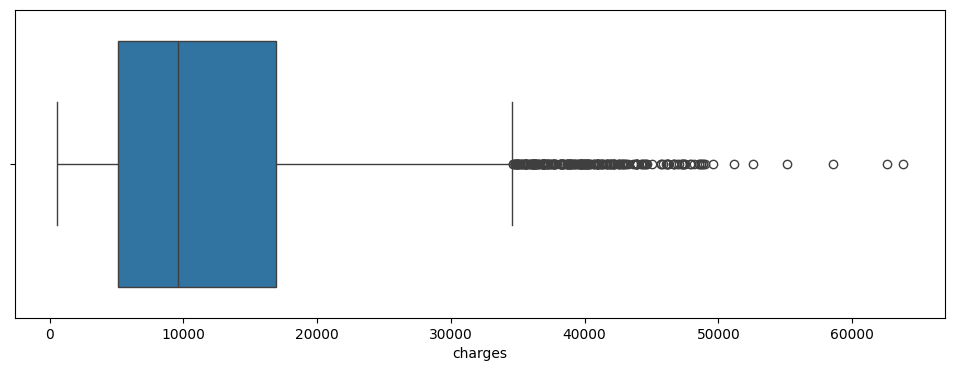

In [74]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['charges'])
plt.show()

#### Observation:
#### • The median is around 9,000, which indicates that half of the 'charges' values are below this point.
#### • 50% of the central data is contained in the box, ranging approximately from 5,000 to 17,000.
#### • The lower whisker ends near 0, while the upper whisker ends around 35,000.
#### • The outliers extend up to approximately 63,000.

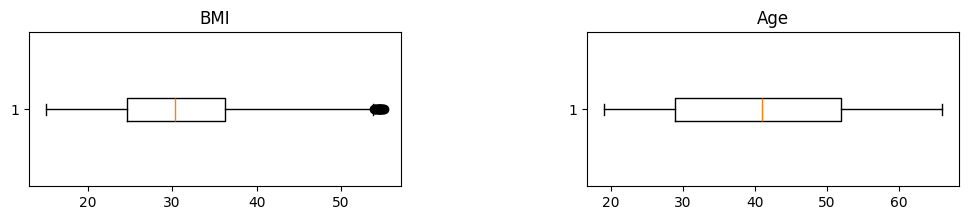

In [75]:
#Check Outliers in other features such as Age and BMI.
cols=['BMI','Age']
fig,ax=plt.subplots(1,2,figsize=(12,2))
for i,col in enumerate(cols):
    ax[i].boxplot(x=df[col].values,vert=False)
    ax[i].set_title(col)
plt.subplots_adjust(wspace=0.5)
plt.show()

#### Observation:
#### • The median BMI is around 30 and age is around 40.
#### • For BMI, there are several outliers beyond the upper whisker, with values approximately exceeding 55.
#### • For age, the whiskers range from around 18 to 64.

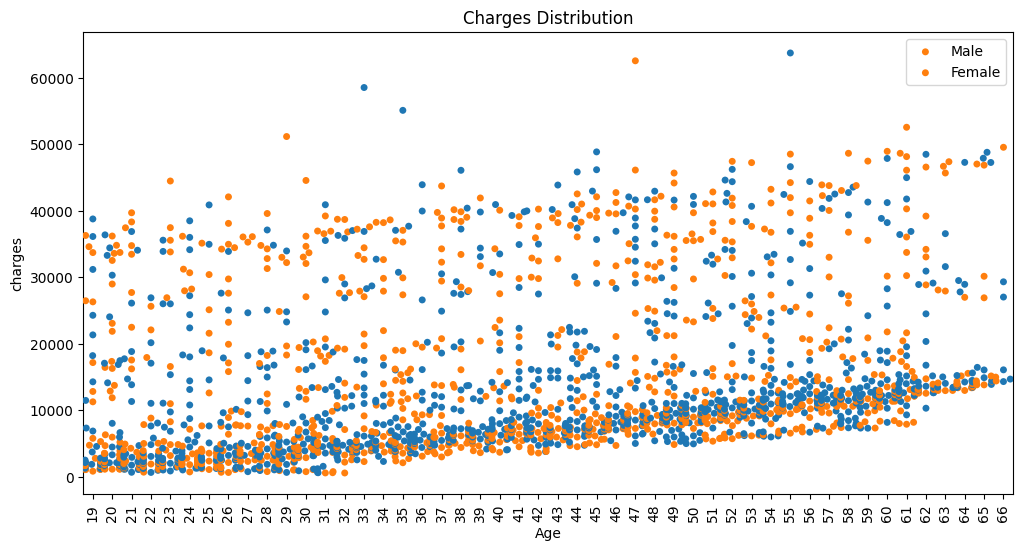

In [76]:
plt.figure(figsize=(12,6))
sns.swarmplot(data=df, y='charges', x='Age', hue='Gender')
plt.title('Charges Distribution')
plt.legend(labels=['Male','Female'])
plt.xticks(rotation=90)
plt.show()

### 10. State how the distribution is different across gender and tiers of hospitals.

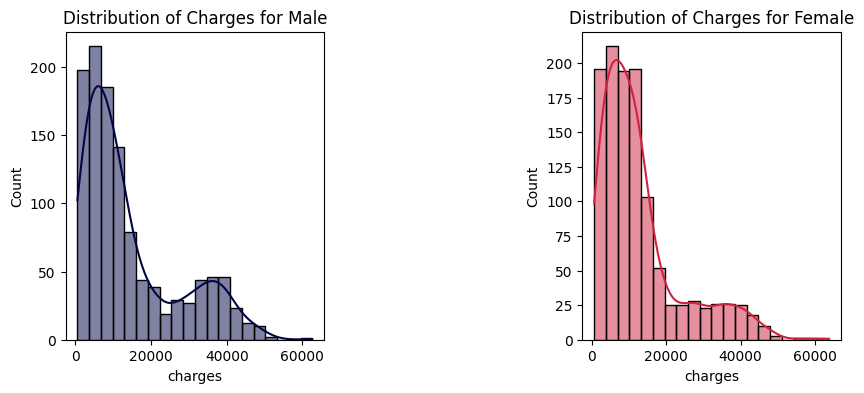

In [77]:
# Plot histogram for male and Female charges

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
for i, (gender, label, color) in enumerate(zip([1, 0], ['Male', 'Female'], ['#020647', '#cf2340'])):
    sns.histplot(df[df['Gender'] == gender]['charges'], ax=ax[i], kde=True, bins=20, color=color)
    ax[i].set_title(f'Distribution of Charges for {label}')

fig.subplots_adjust(wspace=1)
plt.show()

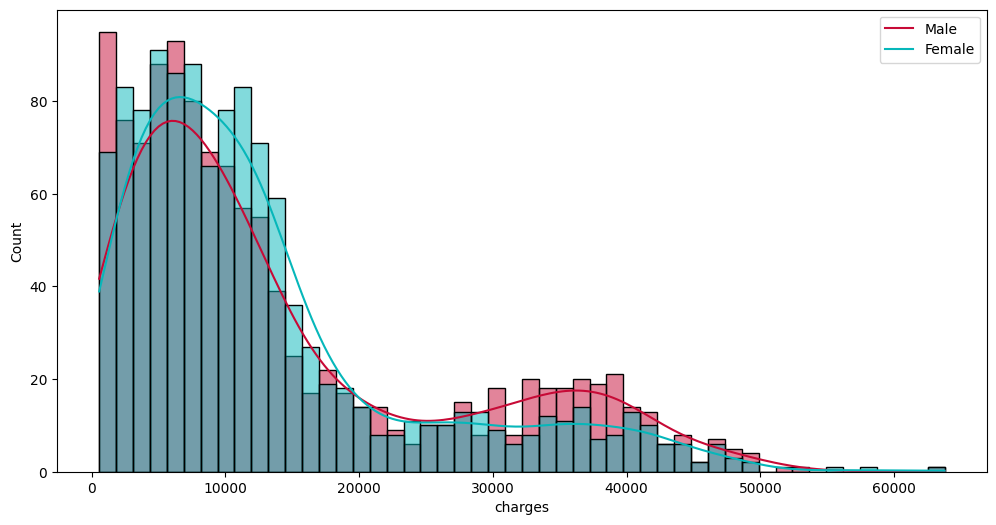

In [78]:
# Plot histogram for combined male and Female charges.
plt.figure(figsize=(12, 6))
custom_palette = ["#06b7ba", "#c70a36"]
sns.histplot(data=df, x='charges', hue='Gender', alpha=0.5, bins=50, palette=custom_palette,kde=True)
plt.legend(labels=['Male', 'Female'])
plt.show()

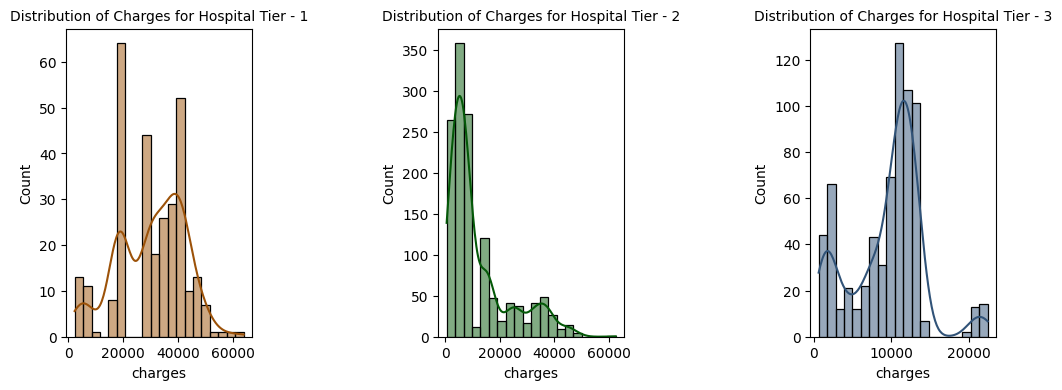

In [79]:
# Plot histogram for Different Tier of hospital charges

fig, ax = plt.subplots(1,3,figsize=(12,4))
hospital_tier = [1,2,3]
color_pal = ['#9c5209','#045908','#315378']

for i, hospital_tier in enumerate(hospital_tier):
    sns.histplot(df[df['Hospital_tier_num'] == hospital_tier]['charges'], ax=ax[i], kde=True, bins=20,color=color_pal[i])
    ax[i].set_title(f'Distribution of Charges for Hospital Tier - {hospital_tier}', fontsize=10)

fig.subplots_adjust(wspace=1)
plt.show()

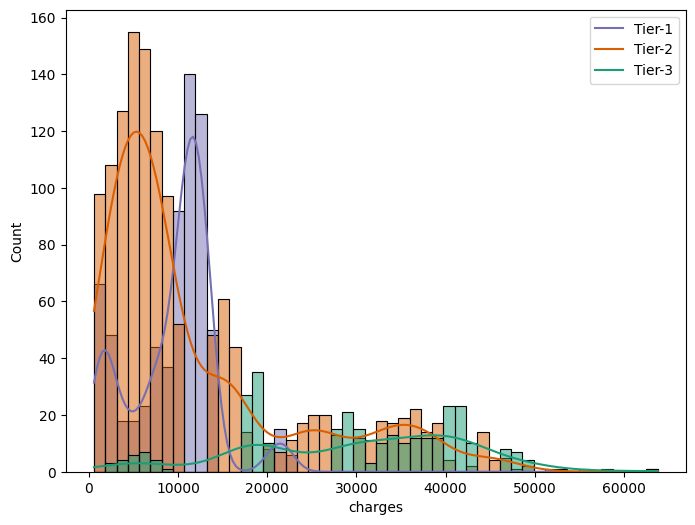

In [80]:
# Plot histogram for combined different Tier of hospital charges
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='charges', hue='Hospital_tier_num', alpha=0.5, bins=50, palette='Dark2', kde=True)
plt.legend(labels=['Tier-1', 'Tier-2', 'Tier-3'])
plt.show()

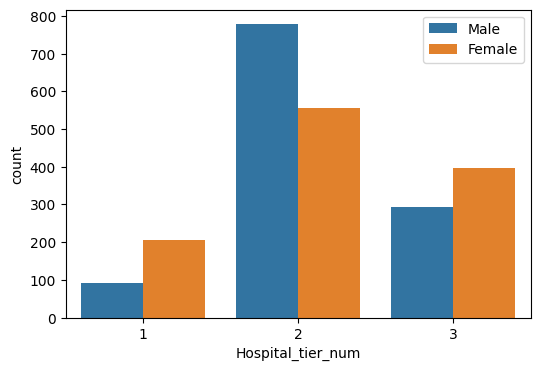

In [81]:
# Plot countplot for different tiers of hospitals across gender.
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Hospital_tier_num', hue='Gender')
plt.legend(labels=['Male', 'Female'])
plt.show()

### 11. Create a radar chart to showcase the median hospitalization cost for each tier of hospitals.

In [82]:
# Calculate the median hospitalization cost for each tier of hospitals
tier_medians = df.groupby('Hospital_tier_num')['charges'].median().reset_index()

#covert tier_medians into dataframe to plot radar plot
r_theta = {'r': tier_medians['charges'].tolist(), 'theta':['Tier-1','Tier-2','Tier-3']}
radar_data = pd.DataFrame(r_theta)
radar_data

,r,theta
0,32097.435,Tier-1
1,7168.760,Tier-2
2,10676.830,Tier-3


In [83]:
import plotly.express as px
radar_plot=px.line_polar(radar_data, r='r',theta='theta',line_close=True)
radar_plot.update_traces(fill='toself')
radar_plot.show()

### 12. Create a frequency table and a stacked bar chart to visualize the count of people in the different tiers of cities and hospitals.

In [84]:
#Create crosstab frequency table
freq_table = pd.crosstab(df['Hospital_tier_num'],df['City_tier_num'])
freq_table

#Calculating hospital tier wise and City tier wise total population
frequency_table=freq_table.copy()
total_city_population = frequency_table.sum(axis=1)
total_hospital_population = frequency_table.sum(axis=0)
frequency_table['City_Total_Population'] = total_city_population
frequency_table.loc['Hosp_Total_Population'] = total_hospital_population

#Calculating total polulation
total_population = total_hospital_population.sum()
frequency_table.loc['Hosp_Total_Population','City_Total_Population'] = total_population
frequency_table

City_tier_num,1,2,3,City_Total_Population
Hospital_tier_num,,,,
1,85.0,106.0,109.0,300.0
2,403.0,479.0,452.0,1334.0
3,241.0,222.0,228.0,691.0
Hosp_Total_Population,729.0,807.0,789.0,2325.0


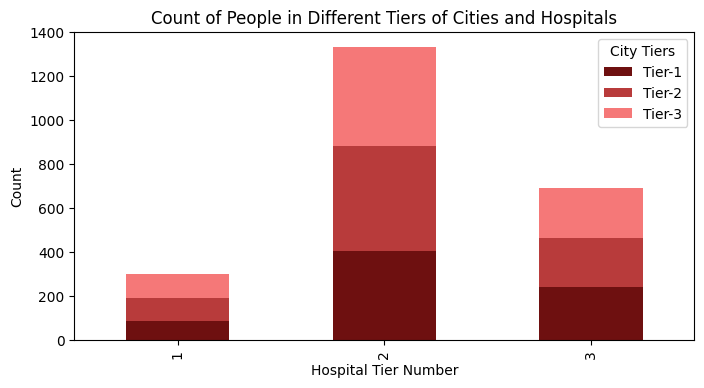

In [85]:
# Create a stacked bar chart 
fig, ax = plt.subplots(figsize=(8, 4))
freq_table.plot(kind='bar', stacked=True, ax=ax, color=['#6e1010', '#b83b3b', '#f57878'])

plt.title('Count of People in Different Tiers of Cities and Hospitals')
plt.xlabel('Hospital Tier Number')
plt.ylabel('Count')
plt.legend(title='City Tiers',labels=['Tier-1', 'Tier-2', 'Tier-3'])
plt.show()

### 13. Test the following null hypotheses:
### a. The average hospitalization costs for the three types of hospitals are not significantly different.
### b. The average hospitalization costs for the three types of cities are not significantly different.
### c. The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers.
### d. Smoking and heart issues are independent.

| Question | X-Variable | Y-Variable | X-Variable Datatype | Y-Variable Datatype | Statistical Test 
| --- | --- | --- | --- | --- | --- |
| Q.13(a) | Hospital Tier | Avg charges | Categorical | Continuous | ANOVA 
| Q.13(b) | City Tier | Avg charges | Categorical | Continuous | ANOVA 
| Q.13(c) | Smoker | Avg charges | Categorical | Continuous | ANOVA 
| Q.13(d) | Smoker | Heart Issues | Categorical | Categorical | Chi Square 

#### H0: Equal Means (or no relationship between variables)
#### Ha: Unequal Means (or effect or relationship between variables)

### Q. 13(a)

In [86]:
# Checking the Avg. value of different Hospital Tiers
avg_tier1_charges=df[df['Hospital_tier_num'] == 1]['charges'].mean()
avg_tier2_charges=df[df['Hospital_tier_num'] == 2]['charges'].mean()
avg_tier3_charges=df[df['Hospital_tier_num'] == 3]['charges'].mean()
print('Avg. Tier-1 Hospital Charges: ',avg_tier1_charges,'\n', 'Avg. Tier-2 Hospital Charges: ',avg_tier2_charges,'\n', 'Avg. Tier-3 Hospital Charges: ', avg_tier3_charges)

#Perform the ANOVA test for the average hospitalization costs for the three types of hospitals.
Tier1_charges=df[df['Hospital_tier_num'] == 1]['charges']
Tier2_charges=df[df['Hospital_tier_num'] == 2]['charges']
Tier3_charges=df[df['Hospital_tier_num'] == 3]['charges']

from scipy.stats import f_oneway
f_stat, p_val = f_oneway(Tier1_charges,Tier2_charges,Tier3_charges)

print('F-statistic: %.3f' %  f_stat)
print('p-value: %.3f' %  p_val)

# Interpret the results
if p_val < 0.05:
    print('Reject the null hypothesis:','\n', 'Conclusion: The average hospitalization costs for the three types of hospitals are significantly different.')
else:
    print('Fail to reject the null hypothesis:','\n', 'Conclusion: The average hospitalization costs for the three types of hospitals are not significantly different.')

Avg. Tier-1 Hospital Charges:  30131.995899999998 
 Avg. Tier-2 Hospital Charges:  11875.883860569715 
 Avg. Tier-3 Hospital Charges:  9487.456222865412
F-statistic: 493.990
p-value: 0.000
Reject the null hypothesis: 
 Conclusion: The average hospitalization costs for the three types of hospitals are significantly different.


### Q. 13(b)

In [87]:
# Checking the Avg. value of different City Tiers
avg_tier1_charges=df[df['City_tier_num'] == 1]['charges'].mean()
avg_tier2_charges=df[df['City_tier_num'] == 2]['charges'].mean()
avg_tier3_charges=df[df['City_tier_num'] == 3]['charges'].mean()
print('Avg. Tier-1 Hospital Charges: ',avg_tier1_charges,'\n', 'Avg. Tier-2 Hospital Charges: ',avg_tier2_charges,'\n', 'Avg. Tier-3 Hospital Charges: ', avg_tier3_charges)

#Perform the ANOVA test for the average hospitalization costs for the three types of cities.
Tier1_charges=df[df['City_tier_num'] == 1]['charges']
Tier2_charges=df[df['City_tier_num'] == 2]['charges']
Tier3_charges=df[df['City_tier_num'] == 3]['charges']

f_stat, p_val = f_oneway(Tier1_charges,Tier2_charges,Tier3_charges)

print('F-statistic: %.3f' %  f_stat)
print('p-value: %.3f' %  p_val)

if p_val < 0.05:
    print('Reject the null hypothesis:','\n', 'Conclusion: The average hospitalization costs for the three types of cities are significantly different.')
else:
    print('Fail to reject the null hypothesis:','\n', 'Conclusion: The average hospitalization costs for the three types of cities are not significantly different.')

Avg. Tier-1 Hospital Charges:  13009.972578875171 
 Avg. Tier-2 Hospital Charges:  13471.919281288725 
 Avg. Tier-3 Hospital Charges:  14045.312065906212
F-statistic: 1.454
p-value: 0.234
Fail to reject the null hypothesis: 
 Conclusion: The average hospitalization costs for the three types of cities are not significantly different.


### Q. 13(c)

In [88]:
# Checking the Avg. value of Smokers and Non-smokers
avg_Smoker_charges=df[df['smoker'] == 'yes']['charges'].mean()
avg_NonSmoker_charges=df[df['smoker'] == 'No']['charges'].mean()
print('Avg. Smoker Charges: ',avg_Smoker_charges,'\n', 'Avg. Non-Smoker Charges: ',avg_NonSmoker_charges)

#Perform the ANOVA test for the average hospitalization costs for the smokers.
Smoker_charges=df[df['smoker'] == 'yes']['charges']
NonSmoker_charges=df[df['smoker'] == 'No']['charges']

f_stat, p_val = f_oneway(Smoker_charges,NonSmoker_charges)

print('F-statistic: %.3f' %  f_stat)
print('p-value: %.3f' %  p_val)

if p_val < 0.05:
    print('Reject the null hypothesis:','\n', 'Conclusion: The average hospitalization costs for the smokers and Non-smokers are significantly different.')
else:
    print('Fail to reject the null hypothesis:','\n', 'Conclusion: The average hospitalization costs for the smokers and Non-smokers are not significantly different.')

Avg. Smoker Charges:  32866.96022633745 
 Avg. Non-Smoker Charges:  8409.19924959217
F-statistic: 5499.054
p-value: 0.000
Reject the null hypothesis: 
 Conclusion: The average hospitalization costs for the smokers and Non-smokers are significantly different.


### Q. 13(d)

In [89]:
# Create a contingency table
contingency_table = pd.crosstab(df['smoker'], df['Heart Issues'])
contingency_table

Heart Issues,No,yes
smoker,,
No,1108,731
yes,297,189


In [90]:
# Perform the Chi-Square test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)

print('Chi-Square Statistic: %.3f' % chi2)
print('p-value: %.3f' % p)

# Interpret the results
if p < 0.05:
    print('Reject the null hypothesis:','\n', 'Conclusion: Smoking and heart issues are not independent.')
else:
    print('Fail to reject the null hypothesis:','\n', 'Conclusion: Smoking and heart issues are independent.')

Chi-Square Statistic: 0.086
p-value: 0.769
Fail to reject the null hypothesis: 
 Conclusion: Smoking and heart issues are independent.


## >> MACHINE LEARNING

### 1. Examine the correlation between predictors to identify highly correlated predictors.

In [91]:
#Creting a new Dataframe with relevant features only
df1=df.copy()
df.drop(['Customer ID', 'year','month','date','Hospital tier','City tier','State ID','name','D.O.B'], axis=1, inplace=True)
df.head()

,children,charges,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,Hospital_tier_num,City_tier_num,State_Flag,Age,Gender
0,0,563.84,17.58,4.51,No,No,No,1,No,2,3,3,32,1
1,0,570.62,17.60,4.39,No,No,No,1,No,2,1,3,31,1
2,0,600.00,16.47,6.35,No,No,Yes,1,No,2,1,3,31,0
3,0,604.54,17.70,6.28,No,No,No,1,No,3,3,3,31,1
4,0,637.26,22.34,5.57,No,No,No,1,No,3,3,3,26,1


In [92]:
# Consider HBA1C>=8 as a Diabetic customer and assign diabetic customer as 1 and non-diabetic as 0.
df['Diabetic'] = df['HBA1C'].apply(lambda x: '1' if x >= 8 else '0')
df.drop(['HBA1C'], axis=1, inplace=True)
df.head()

,children,charges,BMI,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,Hospital_tier_num,City_tier_num,State_Flag,Age,Gender,Diabetic
0,0,563.84,17.58,No,No,No,1,No,2,3,3,32,1,0
1,0,570.62,17.60,No,No,No,1,No,2,1,3,31,1,0
2,0,600.00,16.47,No,No,Yes,1,No,2,1,3,31,0,0
3,0,604.54,17.70,No,No,No,1,No,3,3,3,31,1,0
4,0,637.26,22.34,No,No,No,1,No,3,3,3,26,1,0


In [93]:
#Transform categorical columns into numerical using Label Encoding
df2=df.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_col=['Heart Issues','Any Transplants','Cancer history','smoker']
for i in categorical_col:
    df[i] = le.fit_transform(df[i])
df3=df.copy()
df.head()

,children,charges,BMI,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,Hospital_tier_num,City_tier_num,State_Flag,Age,Gender,Diabetic
0,0,563.84,17.58,0,0,0,1,0,2,3,3,32,1,0
1,0,570.62,17.60,0,0,0,1,0,2,1,3,31,1,0
2,0,600.00,16.47,0,0,1,1,0,2,1,3,31,0,0
3,0,604.54,17.70,0,0,0,1,0,3,3,3,31,1,0
4,0,637.26,22.34,0,0,0,1,0,3,3,3,26,1,0


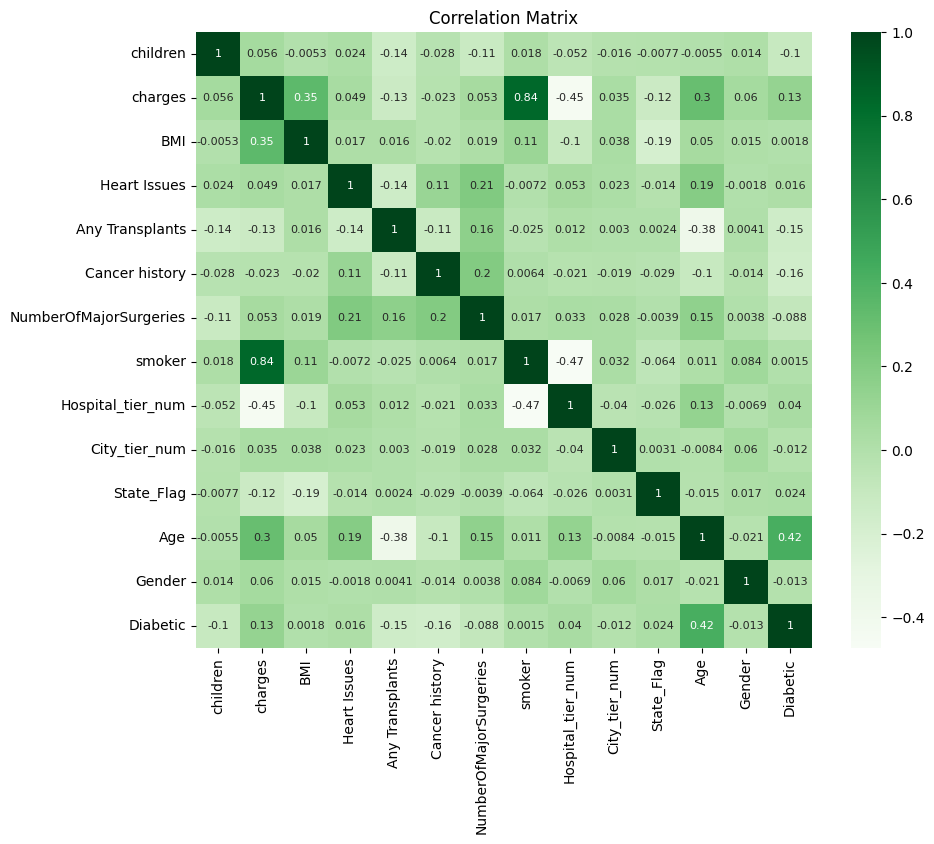

In [94]:
# Correction between predictors using Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Greens', square=True,annot_kws={'fontsize': 8})
plt.title('Correlation Matrix')
plt.show()

##### Observation:
##### The heatmap reveals some notable correlations:
##### - Charges are strongly correlated with smoking, and also show a significant correlation with BMI and age.
##### - Additionally, age is correlated with diabetes, indicating a possible relationship between these two factors.

### 2. Develop a regression model Linear or Ridge. Evaluate the model with k-fold cross validation.
### Also, ensure that you apply all the following suggestions:
### • Implement the stratified 5-fold cross validation technique for both model building and validation.
### • Utilize effective standardization techniques and hyperparameter tuning.
### • Incorporate sklearn-pipelines to streamline the workflow.
### • Apply appropriate regularization techniques to address the bias-variance trade-off.
### • Create five folds in the data, and introduce a variable to identify the folds.
### • Develop Gradient Boost model and determine the variable importance scores, and identify the redundant variables.

In [95]:
#Define X and Y variable for the Regression Model
y=df['charges']
df.pop('charges')
X=df

### Regression Model with Ridge Regression using K-Fold Cross Validation

In [96]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

# Define the k-fold cross validation object
ridge_kfold = KFold(n_splits=5, shuffle=True, random_state=34)

# Define the pipeline for Ridge Regression
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define the hyperparameter tuning space for Ridge Regression
ridge_param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10]}

# Perform k-fold cross validation for Ridge Regression with hyperparameter tuning
ridge_maes = []
ridge_mses = []
ridge_rmses = []
ridge_accuracies = []
ridge_r2s = []

for i, (ridge_train_idx, ridge_val_idx) in enumerate(ridge_kfold.split(X)):
    ridge_X_train, ridge_X_val = X.iloc[ridge_train_idx], X.iloc[ridge_val_idx]
    ridge_y_train, ridge_y_val = y.iloc[ridge_train_idx], y.iloc[ridge_val_idx]
    print(f"Fold {i}:")
    print(f"  Train: index={ridge_train_idx}")
    print(f"  Test:  index={ridge_val_idx}")
    
    ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
    ridge_grid_search.fit(ridge_X_train, ridge_y_train)
    
    ridge_y_pred = ridge_grid_search.predict(ridge_X_val)
    
    ridge_maes.append(mean_absolute_error(ridge_y_val, ridge_y_pred))
    ridge_mses.append(mean_squared_error(ridge_y_val, ridge_y_pred))
    ridge_rmses.append(mean_squared_error(ridge_y_val, ridge_y_pred)**(1/2.0))
    ridge_accuracies.append(explained_variance_score(ridge_y_val, ridge_y_pred))
    ridge_r2s.append(r2_score(ridge_y_val, ridge_y_pred))

# Get the best hyperparameters and the corresponding model
ridge_best_params = ridge_grid_search.best_params_
ridge_best_model = ridge_grid_search.best_estimator_
print(f'Best Hyperparameters: {ridge_best_params}')

# Calculate the average of the metrics
avg_ridge_mae = sum(ridge_maes) / len(ridge_maes)
avg_ridge_mse = sum(ridge_mses) / len(ridge_mses)
avg_ridge_rmse = sum(ridge_rmses) / len(ridge_rmses)
avg_ridge_accuracy = sum(ridge_accuracies) / len(ridge_accuracies) * 100
avg_ridge_r2 = sum(ridge_r2s) / len(ridge_r2s)

print(f'Average MAE: {avg_ridge_mae}')
print(f'Average MSE: {avg_ridge_mse}')
print(f'Average RMSE: {avg_ridge_rmse}')
print(f'Average Accuracy: {avg_ridge_accuracy:.2f}%')
print(f'Average R-squared: {avg_ridge_r2:.2f}')

Fold 0:
  Train: index=[   0    1    2 ... 2322 2323 2324]
  Test:  index=[   5    8   28   45   48   49   54   56   66   71   72   86   90   91
   94   97   98  100  101  114  116  124  130  135  148  155  156  157
  158  160  163  164  169  177  180  183  191  192  206  210  227  228
  229  235  247  250  251  258  260  262  265  287  296  300  302  305
  307  308  310  319  325  332  336  347  348  353  360  364  371  379
  382  386  388  393  407  413  418  427  438  439  442  443  444  459
  465  474  477  482  486  497  502  506  509  516  534  542  544  552
  555  559  561  562  564  566  567  570  571  576  577  579  586  593
  600  602  612  617  624  629  631  632  635  639  649  654  655  659
  666  669  670  680  684  686  687  694  699  706  710  712  715  726
  732  734  735  743  755  765  766  767  769  784  786  787  790  792
  794  797  806  818  824  828  829  835  838  841  843  849  851  858
  869  870  874  881  888  892  897  902  909  910  912  922  930  935
  9

#### The Ridge Regression model with an alpha of 0.001 demonstrates strong predictive performance, with a high R-squared value and accuracy, along with reasonably low error metrics (MAE, MSE, RMSE). This suggests that the model is well-regularized and effectively captures the underlying patterns in the data while maintaining generalizability across different folds of the cross-validation.

### Gradient Boosting Model with Variable Importance Scores

In [97]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the pipeline for Gradient Boosting
gb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingRegressor())
])

# Define the hyperparameter tuning space for Gradient Boosting
gb_param_grid = {
    'gb__n_estimators': [100, 200, 300, 400, 500, 1000],
    #'gb__learning_rate': [0.3, 0.5, 1],
    #'gb__max_depth': [1,2],
    #'gb__min_samples_split': [3,4,5],
    #'gb__min_samples_leaf': [1,2]
}

# Define the k-fold cross validation object
gb_kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross validation for Gradient Boosting with hyperparameter tuning
gb_maes = []
gb_mses = []
gb_rmses = []
gb_accuracies = []
gb_r2s = []

for i, (gb_train_idx, gb_val_idx) in enumerate(gb_kfold.split(X)):
    gb_X_train, gb_X_val = X.iloc[gb_train_idx], X.iloc[gb_val_idx]
    gb_y_train, gb_y_val = y.iloc[gb_train_idx], y.iloc[gb_val_idx]
    print(f"Fold {i+1}:")
    #print(f"  Train: index={gb_train_idx}")
    #print(f"  Test:  index={gb_val_idx}")
    
    gb_grid_search = GridSearchCV(gb_pipeline, gb_param_grid, cv=5, scoring='neg_mean_squared_error',verbose=2)
    gb_grid_search.fit(gb_X_train, gb_y_train)
    
    gb_y_pred = gb_grid_search.predict(gb_X_val)
    
    gb_maes.append(mean_absolute_error(gb_y_val, gb_y_pred))
    gb_mses.append(mean_squared_error(gb_y_val, gb_y_pred))
    gb_rmses.append(mean_squared_error(gb_y_val, gb_y_pred)**(1/2.0))
    gb_accuracies.append(explained_variance_score(gb_y_val, gb_y_pred))
    gb_r2s.append(r2_score(gb_y_val, gb_y_pred))

# Get the best hyperparameters and the corresponding model
gb_best_params = gb_grid_search.best_params_
gb_best_model = gb_grid_search.best_estimator_
print(f'Best Hyperparameters: {gb_best_params}')

Fold 1:
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ................................gb__n_estimators=50; total time=   0.0s
[CV] END ................................gb__n_estimators=50; total time=   0.0s
[CV] END ................................gb__n_estimators=50; total time=   0.0s
[CV] END ................................gb__n_estimators=50; total time=   0.0s
[CV] END ................................gb__n_estimators=50; total time=   0.0s
[CV] END ...............................gb__n_estimators=100; total time=   0.1s
[CV] END ...............................gb__n_estimators=100; total time=   0.1s
[CV] END ...............................gb__n_estimators=100; total time=   0.1s
[CV] END ...............................gb__n_estimators=100; total time=   0.1s
[CV] END ...............................gb__n_estimators=100; total time=   0.1s
[CV] END ...............................gb__n_estimators=200; total time=   0.4s
[CV] END ...............................g

In [98]:
# Calculate the average of the metrics
avg_gb_mae = sum(gb_maes) / len(gb_maes)
avg_gb_mse = sum(gb_mses) / len(gb_mses)
avg_gb_rmse = sum(gb_rmses) / len(gb_rmses)
avg_gb_accuracy = sum(gb_accuracies) / len(gb_accuracies) * 100
avg_gb_r2 = sum(gb_r2s) / len(gb_r2s)

print(f'Average MAE: {avg_gb_mae}')
print(f'Average MSE: {avg_gb_mse}')
print(f'Average RMSE: {avg_gb_rmse}')
print(f'Average Accuracy: {avg_gb_accuracy:.2f}%')
print(f'Average R-squared: {avg_gb_r2:.2f}')

Average MAE: 2125.803116928094
Average MSE: 13082270.633482825
Average RMSE: 3584.6096743740395
Average Accuracy: 90.80%
Average R-squared: 0.91


#### The Gradient Boosting model outperforms the Ridge Regression model in terms of error metrics (MAE, MSE, RMSE), accuracy, and R-squared value. This suggests that Gradient Boosting is better suited for this regression task, providing more accurate and reliable predictions compared to Ridge Regression.

In [99]:
# Get the feature importance scores
feature_importances = gb_best_model.named_steps['gb'].feature_importances_

# Create a DataFrame to store the feature importance scores
df_feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
df_feature_importances_sort = df_feature_importances.sort_values(by='Importance', ascending=False)
print(df_feature_importances_sort)


                   Feature  Importance
6                   smoker    0.717429
1                      BMI    0.127649
10                     Age    0.103964
7        Hospital_tier_num    0.027680
9               State_Flag    0.011800
0                 children    0.007196
12                Diabetic    0.001128
11                  Gender    0.001030
8            City_tier_num    0.000821
2             Heart Issues    0.000607
5   NumberOfMajorSurgeries    0.000324
3          Any Transplants    0.000237
4           Cancer history    0.000136


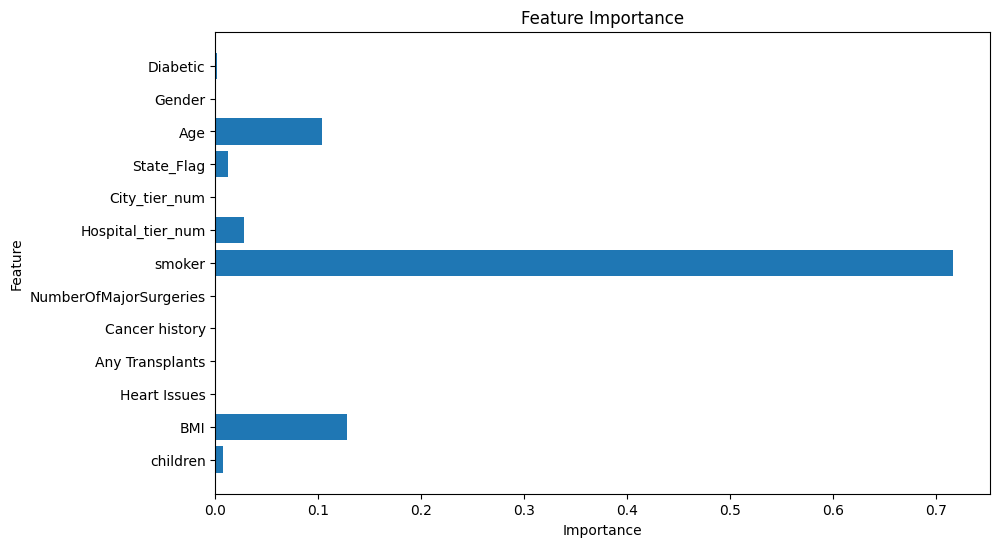

In [100]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(df_feature_importances)), df_feature_importances['Importance'])
plt.yticks(range(len(df_feature_importances)), df_feature_importances['Feature'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

#### The feature importance scores show that 'smoker' is the most significant predictor, while features like 'Cancer history' and 'Any Transplants' have minimal impact.

In [101]:
# Identify redundant variables by selecting features with importance < 0.01
redundant_variables = df_feature_importances[df_feature_importances['Importance'] < 0.01]['Feature'].tolist()
print(f'Redundant Variables: {redundant_variables}')

Redundant Variables: ['children', 'Heart Issues', 'Any Transplants', 'Cancer history', 'NumberOfMajorSurgeries', 'City_tier_num', 'Gender', 'Diabetic']


### 3. Case scenario:
### Estimate the cost of hospitalization for Christopher, Ms. Jayna (Date of birth 12/28/1988; height 170 cm; and weight 85 kgs). She lives with her partner and two children in a tier-1 city, and her state’s State ID is R1011. She was found to be nondiabetic (HbA1c = 5.8). She smokes but is otherwise healthy. She has had no transplants or major surgeries. Her father died of lung cancer. Hospitalization costs will be estimated using tier-1 hospitals.

In [102]:
#Age Calculation
jayna_dob ='12/28/1988'
jayna_dob = pd.to_datetime(jayna_dob, format='%m/%d/%Y')
jayna_age = age_calculation(jayna_dob.date())
print(jayna_age)

35


In [103]:
#BMI Calculation
jayna_height = 170
jayna_weight = 85
jayna_bmi = round(jayna_weight / ((jayna_height/100) ** 2),2)     # Convert height from cm to m
print(jayna_bmi)

29.41


In [104]:
#Make Dataframe
jayna_df =pd.DataFrame({'children':[2], 'BMI':[jayna_bmi],
       'Heart Issues':[0], 'Any Transplants':[0], 'Cancer history':[1],
       'NumberOfMajorSurgeries':[0], 'smoker':[1], 'Hospital_tier_num':[1],
       'City_tier_num':[1], 'State_Flag':[1], 'Age':[jayna_age], 'Gender': [0], 'Diabetic':[0]})
jayna_df

,children,BMI,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,Hospital_tier_num,City_tier_num,State_Flag,Age,Gender,Diabetic
0,2,29.41,0,0,1,0,1,1,1,1,35,0,0


In [105]:
#Hospital_cost Calculation
ridge_hospitalization_cost = ridge_grid_search.predict(jayna_df)
print(f"Predicted Hospitalization Cost: {round(ridge_hospitalization_cost[0], 3)}")

Predicted Hospitalization Cost: 31879.883


### 4. Find the predicted hospitalization cost using the best models (Gradient Boosting Model)

In [106]:
gb_hospitalization_cost= gb_grid_search.predict(jayna_df)
print(f"Predicted Hospitalization Cost: {round(gb_hospitalization_cost[0],3)}")

Predicted Hospitalization Cost: 27831.229
